In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
from config_weather import weather_api_key

In [2]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
#adding date to convert data whenever doing analysis of plots
today = pd.Timestamp("today").strftime("%m/%d/%Y")

In [4]:
from citipy import citipy

In [5]:
# Output File (CSV)
output_data_file = 'output_data/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

In [7]:
#setting up test city
#so layed out one city set to get the specific directions to draw that specific data out as shown below
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'
num_city = 0
set_num = 1
name_of_city = cities[0]

query_url = f'{url}appid={weather_api_key}&q={name_of_city}&units={units}'
weather_response = requests.get(query_url)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4, sort_keys=True))

#want: city, Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 40.5982,
        "lon": -124.1573
    },
    "dt": 1612139621,
    "id": 5563839,
    "main": {
        "feels_like": 42.55,
        "humidity": 94,
        "pressure": 1014,
        "temp": 54.1,
        "temp_max": 55,
        "temp_min": 53.01
    },
    "name": "Fortuna",
    "rain": {
        "1h": 0.3
    },
    "sys": {
        "country": "US",
        "id": 4127,
        "sunrise": 1612106819,
        "sunset": 1612143191,
        "type": 1
    },
    "timezone": -28800,
    "visibility": 8047,
    "weather": [
        {
            "description": "light rain",
            "icon": "10d",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 110,
        "gust": 27.63,
        "speed": 21.85
    }
}


In [8]:
print(f'Beginning Data Retrieval')     
print(f'-----------------------------')

#making lists of data
cities_names = []
list_Lat = []
list_Lng = []
max_temps = []
list_of_humidity = []
cloudiness = []
wind_speeds = []
countries = []
dates = []

#from there, we want to go through each city in the list of cities
#withdraw data for each city in query_url
for city in cities:
    try:
        name_of_city = city
        query_url = f'{url}appid={weather_api_key}&q={name_of_city}&units={units}'
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        
#collecting Lat of specific city in cities       
        Lat = weather_json['coord']['lat']
       
#collecting Lng of specific city in cities
        Lng = weather_json['coord']['lon']
    
#collecting max temp of specific city in cities
        temp = weather_json['main']['temp_max']
       
#collecting humidity of specific city in cities
        humidity = weather_json['main']['humidity']
      
#collecting cloudiness of specific city in cities
        clouds = weather_json['clouds']['all']
        
#collecting wind speed of specific city in cities
        wind = weather_json['wind']['speed']
        
#collecting country of specific city in cities
        country = weather_json['sys']['country']
       
#collecting date of specific city in cities
        date = weather_json['dt']
        
        cities_names.append(name_of_city)
        list_Lat.append(Lat)
        list_Lng.append(Lng)
        max_temps.append(temp)
        list_of_humidity.append(humidity)
        cloudiness.append(clouds)
        wind_speeds.append(wind)
        countries.append(country)
        dates.append(date)
        
        print(f'Processing Record {num_city} of Set {set_num} |{city}')

        num_city = num_city + 1
        if num_city >= 50:
            num_city = 0
            set_num = set_num + 1
        
    except:
        bold = '\033[1m not \033[0m'
        print(f'City {bold} found. Skipping...')

Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 1 |fortuna
Processing Record 1 of Set 1 |qaanaaq
Processing Record 2 of Set 1 |vaini
Processing Record 3 of Set 1 |broome
Processing Record 4 of Set 1 |atuona
Processing Record 5 of Set 1 |carnarvon
Processing Record 6 of Set 1 |bluff
Processing Record 7 of Set 1 |donskoye
Processing Record 8 of Set 1 |punta arenas
Processing Record 9 of Set 1 |karratha
Processing Record 10 of Set 1 |nikolskoye
Processing Record 11 of Set 1 |faanui
Processing Record 12 of Set 1 |kruisfontein
Processing Record 13 of Set 1 |rikitea
Processing Record 14 of Set 1 |cao bang
Processing Record 15 of Set 1 |mackay
Processing Record 16 of Set 1 |wajid
City  not  found. Skipping...
Processing Record 17 of Set 1 |jamestown
City  not  found. Skipping...
Processing Record 18 of Set 1 |ahipara
Processing Record 19 of Set 1 |arraial do cabo
Processing Record 20 of Set 1 |ushuaia
Processing Record 21 of Set 1 |cape town
Processing Record

Processing Record 32 of Set 4 |sitka
Processing Record 33 of Set 4 |yumen
Processing Record 34 of Set 4 |zhongxing
Processing Record 35 of Set 4 |muros
Processing Record 36 of Set 4 |butaritari
Processing Record 37 of Set 4 |saint-philippe
Processing Record 38 of Set 4 |mayo
Processing Record 39 of Set 4 |manavalakurichi
Processing Record 40 of Set 4 |sao geraldo do araguaia
Processing Record 41 of Set 4 |tombouctou
Processing Record 42 of Set 4 |sao joao da barra
Processing Record 43 of Set 4 |puri
Processing Record 44 of Set 4 |coahuayana
Processing Record 45 of Set 4 |peniche
Processing Record 46 of Set 4 |torbay
Processing Record 47 of Set 4 |avarua
City  not  found. Skipping...
Processing Record 48 of Set 4 |puerto ayora
Processing Record 49 of Set 4 |tshane
Processing Record 0 of Set 5 |marzuq
City  not  found. Skipping...
Processing Record 1 of Set 5 |manggar
Processing Record 2 of Set 5 |batagay-alyta
Processing Record 3 of Set 5 |chopinzinho
Processing Record 4 of Set 5 |tuata

Processing Record 20 of Set 8 |makueni
Processing Record 21 of Set 8 |dunkirk
Processing Record 22 of Set 8 |nanortalik
Processing Record 23 of Set 8 |mildura
Processing Record 24 of Set 8 |port keats
Processing Record 25 of Set 8 |mongo
Processing Record 26 of Set 8 |songjianghe
City  not  found. Skipping...
Processing Record 27 of Set 8 |huanan
Processing Record 28 of Set 8 |marfino
Processing Record 29 of Set 8 |magdalena
Processing Record 30 of Set 8 |ribeira grande
Processing Record 31 of Set 8 |evensk
Processing Record 32 of Set 8 |vostok
Processing Record 33 of Set 8 |kenai
Processing Record 34 of Set 8 |moba
City  not  found. Skipping...
Processing Record 35 of Set 8 |airai
Processing Record 36 of Set 8 |kahului
Processing Record 37 of Set 8 |santa cruz del sur
Processing Record 38 of Set 8 |carora
Processing Record 39 of Set 8 |buta
Processing Record 40 of Set 8 |hervey bay
Processing Record 41 of Set 8 |nizhnevartovsk
Processing Record 42 of Set 8 |progreso
Processing Record 

Processing Record 9 of Set 12 |antofagasta
Processing Record 10 of Set 12 |byron bay
Processing Record 11 of Set 12 |awjilah
Processing Record 12 of Set 12 |nortelandia
Processing Record 13 of Set 12 |xichang
Processing Record 14 of Set 12 |arvika
Processing Record 15 of Set 12 |meadow lake
Processing Record 16 of Set 12 |moroni
Processing Record 17 of Set 12 |pochutla


In [9]:
#convert data into dataframe
data = {'City': cities_names,
        'Lat': list_Lat,
        'Lng': list_Lng,
        'Max_Temp': max_temps,
        'Humidity': list_of_humidity,
        'Cloudiness': cloudiness,
        'Wind_Speed': wind_speeds,
        'Country': countries,
        'Date': dates}

#making dataframe
weather_df = pd.DataFrame(data)

#giving name to index for csv file header
weather_df.index.names = ['City_ID']
weather_df

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
City_ID,,,,,,,,,
0,fortuna,40.5982,-124.1573,55.00,94,75,21.85,US,1612139621
1,qaanaaq,77.4840,-69.3632,-4.81,88,100,1.48,GL,1612139486
2,vaini,-21.2000,-175.2000,80.60,89,90,10.36,TO,1612139621
3,broome,42.2506,-75.8330,24.01,86,90,9.22,US,1612139621
4,atuona,-9.8000,-139.0333,78.91,75,1,17.52,PF,1612139622
...,...,...,...,...,...,...,...,...,...
563,xichang,27.8964,102.2634,46.00,45,9,1.16,CN,1612139794
564,arvika,59.6553,12.5852,3.20,92,54,1.74,SE,1612139794
565,meadow lake,34.8014,-106.5436,50.00,27,40,3.89,US,1612139795


In [10]:
#create csv file of above dataframe
weather_df.to_csv(output_data_file, index = True, header = True)

In [11]:
#retrieval of information into summary dataframe
#adjusted dataframe to include all index values, but not the 'City' column
adjusted_df = weather_df.loc[:, weather_df.columns != 'City']

#retrieving data for all columns in new dataframe
count = adjusted_df.count()
mean = adjusted_df.mean()
std = adjusted_df.std()
min_values = adjusted_df.min()
one_quantile = adjusted_df.quantile(.25)
two_quantile = adjusted_df.quantile(.5)
three_quantile = adjusted_df.quantile(.75)
max_values = adjusted_df.max()

#making dataframe
index_name = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
analy_data = [count, mean, std, min_values, one_quantile, two_quantile, three_quantile, max_values]
compiled_weather_df = pd.DataFrame(analy_data, columns = ['Lat', 'Lng', 'Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed', 'Date'], index = index_name)
compiled_weather_df

,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Date
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,5.680000e+02
mean,18.198740,21.616890,51.242975,74.288732,55.329225,8.479701,1.612140e+09
std,33.124859,90.560347,31.812968,19.417653,40.020485,6.264625,9.018889e+01
min,-54.800000,-179.166700,-44.810000,13.000000,0.000000,0.310000,1.612139e+09
25%,-9.083750,-56.316875,30.200000,65.000000,15.750000,3.850000,1.612140e+09
50%,20.147200,24.523500,64.080000,79.000000,72.000000,6.910000,1.612140e+09
75%,46.446825,101.890875,77.000000,88.000000,98.000000,11.500000,1.612140e+09
max,78.218600,179.316700,93.000000,100.000000,100.000000,53.690000,1.612140e+09


In [12]:
#removing data with cities that have humidity > 100%
index_names = weather_df[weather_df['Humidity'] > 100].index 

#displaying indices of cities with humidity over 100%
index_names

Int64Index([], dtype='int64', name='City_ID')

In [13]:
clean_city_data = weather_df.drop(index_names, inplace = False)
clean_city_data

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
City_ID,,,,,,,,,
0,fortuna,40.5982,-124.1573,55.00,94,75,21.85,US,1612139621
1,qaanaaq,77.4840,-69.3632,-4.81,88,100,1.48,GL,1612139486
2,vaini,-21.2000,-175.2000,80.60,89,90,10.36,TO,1612139621
3,broome,42.2506,-75.8330,24.01,86,90,9.22,US,1612139621
4,atuona,-9.8000,-139.0333,78.91,75,1,17.52,PF,1612139622
...,...,...,...,...,...,...,...,...,...
563,xichang,27.8964,102.2634,46.00,45,9,1.16,CN,1612139794
564,arvika,59.6553,12.5852,3.20,92,54,1.74,SE,1612139794
565,meadow lake,34.8014,-106.5436,50.00,27,40,3.89,US,1612139795


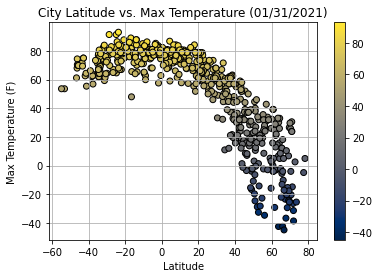

In [14]:
#latitude vs temp plot
x = clean_city_data['Lat']
y = clean_city_data['Max_Temp']
t = y
lat_temp_plot = plt.scatter(x, y, c = t, cmap = 'cividis', edgecolors= 'black')
plt.colorbar()
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs. Max Temperature ({today})')

#png
output_data_file = 'output_data/General_Plotted_Figures/lat_temp_plot.png'
plt.savefig(output_data_file)

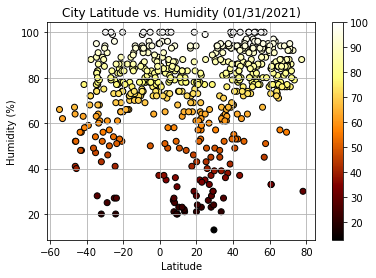

In [15]:
#latitude vs humidity plot
x = clean_city_data['Lat']
y = clean_city_data['Humidity']
t = y
lat_humidity_plot = plt.scatter(x, y, c = t, cmap = 'afmhot', edgecolors= 'black')
plt.colorbar()
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({today})')

#png
output_data_file = 'output_data/General_Plotted_Figures/lat_humidity_plot.png'
plt.savefig(output_data_file)

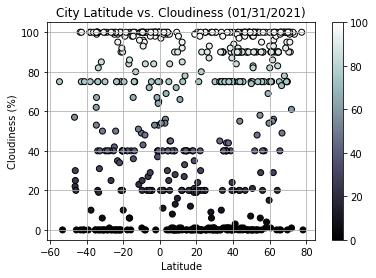

In [16]:
x = clean_city_data['Lat']
y = clean_city_data['Cloudiness']
t = y
lat_cloudiness_plot = plt.scatter(x, y, c = t, cmap = 'bone', edgecolors= 'black')
plt.colorbar()
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness ({today})')

#png
output_data_file = 'output_data/General_Plotted_Figures/lat_cloudiness_plot.png'
plt.savefig(output_data_file)

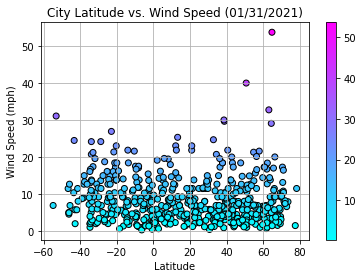

In [17]:
x = clean_city_data['Lat']
y = clean_city_data['Wind_Speed']
t = y
lat_wind_speed_plot = plt.scatter(x, y, c = t, cmap = 'cool', edgecolors= 'black')
plt.colorbar()
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs. Wind Speed ({today})')

#png
output_data_file = 'output_data/General_Plotted_Figures/lat_wind_speed_plot.png'
plt.savefig(output_data_file)

In [18]:
#Northern Hemisphere
#finding southern hemisphere values
southern_hemisphere = clean_city_data[clean_city_data['Lat'] < 0].index 
print(southern_hemisphere)

#dropping southern values
north_data = clean_city_data.drop(southern_hemisphere, inplace = False)
north_data

Int64Index([  0,   1,   3,   7,  10,  14,  16,  17,  25,  27,
            ...
            548, 550, 551, 552, 558, 561, 563, 564, 565, 567],
           dtype='int64', name='City_ID', length=378)


,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
City_ID,,,,,,,,,
2,vaini,-21.2000,-175.2000,80.60,89,90,10.36,TO,1612139621
4,atuona,-9.8000,-139.0333,78.91,75,1,17.52,PF,1612139622
5,carnarvon,-24.8667,113.6333,91.40,27,42,12.66,AU,1612139622
6,bluff,-46.6000,168.3333,61.20,67,57,11.48,NZ,1612139482
8,punta arenas,-53.1500,-70.9167,53.60,62,0,31.07,CL,1612139340
...,...,...,...,...,...,...,...,...,...
557,rawson,-43.3002,-65.1023,69.40,48,0,24.47,AR,1612139793
559,antofagasta,-23.6500,-70.4000,68.00,77,75,12.66,CL,1612139793
560,byron bay,-28.6500,153.6167,80.60,61,40,11.50,AU,1612139571


In [ ]:
#Southern Hemisphere
#finding northern hemisphere values
northern_hemisphere = clean_city_data[clean_city_data['Lat'] >= 0].index 
print(northern_hemisphere)

#dropping northern values
south_data = clean_city_data.drop(northern_hemisphere, inplace = False)
south_data

The r-value is -0.8634369711162098.


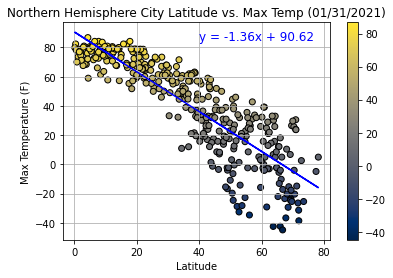

In [33]:
#Northern Max Temp vs Latitude Linear Regression
x = north_data['Lat']
y = north_data['Max_Temp']
t = y
north_lat_temp_plot = plt.scatter(x, y, c = t, cmap = 'cividis', edgecolors= 'black')
plt.colorbar()
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'Northern Hemisphere City Latitude vs. Max Temp ({today})')

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x, regress_values, c = 'blue')
plt.text(40, 85, line_eq, fontsize = 12, c = 'blue')

#r value
print(f'The r-value is {rvalue}.')

#png
output_data_file = 'output_data/Northern_Hemisphere_Figures/north_lat_temp_plot.png'
plt.savefig(output_data_file)

The r-value is 0.41139995089383885.


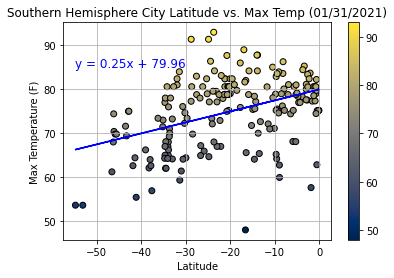

In [19]:
#Southern Max Temp vs Latitude Linear Regression
x = south_data['Lat']
y = south_data['Max_Temp']
t = y
south_lat_temp_plot = plt.scatter(x, y, c = t, cmap = 'cividis', edgecolors= 'black')
plt.colorbar()
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'Southern Hemisphere City Latitude vs. Max Temp ({today})')

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x, regress_values, c = 'blue')
plt.text(-55, 85, line_eq, fontsize = 12, c = 'blue')

#r value
print(f'The r-value is {rvalue}.')

#png
output_data_file = 'output_data/Southern_Hemisphere_Figures/south_lat_temp_plot.png'
plt.savefig(output_data_file)

The r-value is 0.3307083524735721.


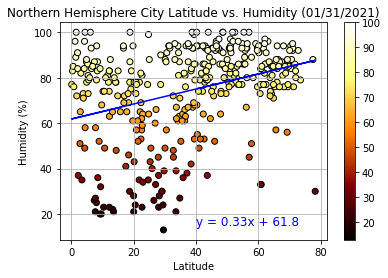

In [34]:
#Northern Humidity vs Latitude Linear Regression
x = north_data['Lat']
y = north_data['Humidity']
t = y
north_lat_humidity_plot = plt.scatter(x, y, c = t, cmap = 'afmhot', edgecolors= 'black')
plt.colorbar()
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Northern Hemisphere City Latitude vs. Humidity ({today})')

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x, regress_values, c = 'blue')
plt.text(40, 15, line_eq, fontsize = 12, c = 'blue')

#r value
print(f'The r-value is {rvalue}.')

#png
output_data_file = 'output_data/Northern_Hemisphere_Figures/north_lat_humidity_plot.png'
plt.savefig(output_data_file)

The r-value is 0.41467303253546345.


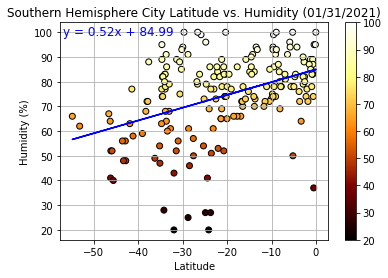

In [20]:
#Southern Humidity vs Latitude Linear Regression
x = south_data['Lat']
y = south_data['Humidity']
t = y
south_lat_humidity_plot = plt.scatter(x, y, c = t, cmap = 'afmhot', edgecolors= 'black')
plt.colorbar()
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Southern Hemisphere City Latitude vs. Humidity ({today})')

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x, regress_values, c = 'blue')
plt.text(-57, 99, line_eq, fontsize = 12, c = 'blue')

#r value
print(f'The r-value is {rvalue}.')

#png
output_data_file = 'output_data/Southern_Hemisphere_Figures/south_lat_humidity_plot.png'
plt.savefig(output_data_file)

The r-value is 0.3493982349136112.


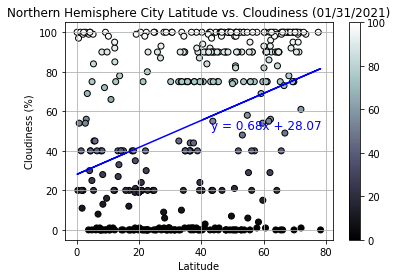

In [35]:
#Northern Cloudiness vs Latitude Linear Regression
x = north_data['Lat']
y = north_data['Cloudiness']
t = y
north_lat_cloudiness_plot = plt.scatter(x, y, c = t, cmap = 'bone', edgecolors= 'black')
plt.colorbar()
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Northern Hemisphere City Latitude vs. Cloudiness ({today})')

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x, regress_values, c = 'blue')
plt.text(43, 51, line_eq, fontsize = 12, c = 'blue')

#r value
print(f'The r-value is {rvalue}.')

#png
output_data_file = 'output_data/Northern_Hemisphere_Figures/north_lat_cloudiness_plot.png'
plt.savefig(output_data_file)

The r-value is 0.2462600310789987.


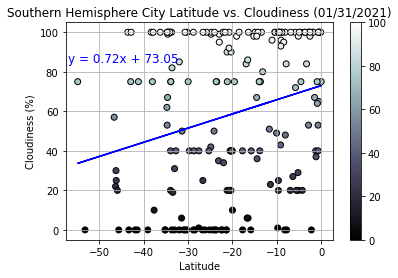

In [28]:
#Southern Cloudiness vs Latitude Linear Regression
x = south_data['Lat']
y = south_data['Cloudiness']
t = y
south_lat_cloudiness_plot = plt.scatter(x, y, c = t, cmap = 'bone', edgecolors= 'black')
plt.colorbar()
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Southern Hemisphere City Latitude vs. Cloudiness ({today})')

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x, regress_values, c = 'blue')
plt.text(-57, 85, line_eq, fontsize = 12, c = 'blue')

#r value
print(f'The r-value is {rvalue}.')

#png
output_data_file = 'output_data/Southern_Hemisphere_Figures/south_lat_cloudiness_plot.png'
plt.savefig(output_data_file)

The r-value is 0.050073062057654515.


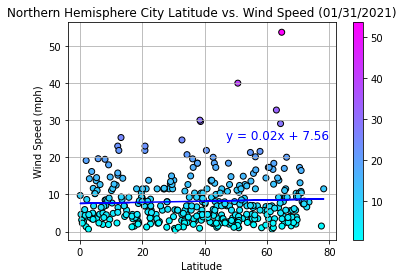

In [36]:
#Northern Wind Speed vs Latitude Linear Regression
x = north_data['Lat']
y = north_data['Wind_Speed']
t = y
north_lat_wind_speed_plot = plt.scatter(x, y, c = t, cmap = 'cool', edgecolors= 'black')
plt.colorbar()
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Northern Hemisphere City Latitude vs. Wind Speed ({today})')

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x, regress_values, c = 'blue')
plt.text(47, 25, line_eq, fontsize = 12, c = 'blue')

#r value
print(f'The r-value is {rvalue}.')

#png
output_data_file = 'output_data/Northern_Hemisphere_Figures/north_lat_wind_speed_plot.png'
plt.savefig(output_data_file)

The r-value is -0.21927087782760982.


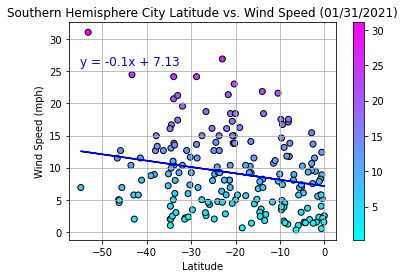

In [37]:
#Southern Wind Speed vs Latitude Linear Regression
x = south_data['Lat']
y = south_data['Wind_Speed']
t = y
south_lat_wind_speed_plot = plt.scatter(x, y, c = t, cmap = 'cool', edgecolors= 'black')
plt.colorbar()
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Southern Hemisphere City Latitude vs. Wind Speed ({today})')

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x, regress_values, c = 'blue')
plt.text(-55, 26, line_eq, fontsize = 12, c = 'blue')

#r value
print(f'The r-value is {rvalue}.')

#png
output_data_file = 'output_data/Southern_Hemisphere_Figures/south_lat_wind_speed_plot.png'
plt.savefig(output_data_file)